# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.295838e+01     1.402848e+01
 * time: 0.0030040740966796875
     1     6.324689e+01     1.131194e+01
 * time: 0.008959054946899414
     2     5.677930e+01     1.442738e+01
 * time: 0.022329092025756836
     3     4.250432e+01     1.035235e+01
 * time: 0.03986716270446777
     4     3.347284e+01     8.892913e+00
 * time: 0.12164902687072754
     5     1.518316e+01     3.085938e+00
 * time: 0.14008116722106934
     6     1.463857e+01     4.774491e+00
 * time: 0.15064620971679688
     7     1.275341e+01     3.545773e+00
 * time: 0.16341710090637207
     8     1.063327e+01     3.579395e+00
 * time: 0.17622804641723633
     9     9.800297e+00     2.541456e+00
 * time: 0.18922901153564453
    10     8.776407e+00     2.422272e+00
 * time: 0.2020552158355713
    11     8.154234e+00     1.929485e+00
 * time: 0.21502399444580078
    12     7.365305e+00     1.844982e+00
 * time: 0.22543811798095703
    13     6.915847e+00     1.425573e+00
 * ti

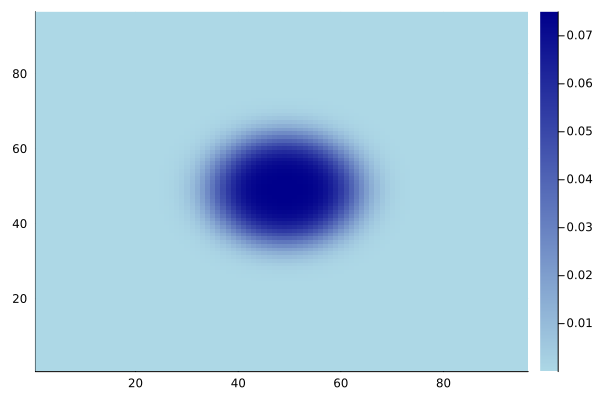

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)